In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#load data
df = pd.read_csv('data_with_labels.csv')
df.describe()
df.head()
df.shape


(1372, 5)

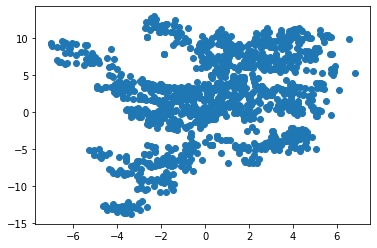

In [142]:
plt.scatter(df.V1, df.V2);


In [143]:
from sklearn.cluster import KMeans, SpectralClustering
data = np.column_stack(( df.V1, df.V2)) 
km_res = KMeans(n_clusters = 2).fit(data)
clusters = km_res.cluster_centers_
print(clusters)
df['KMeans'] = km_res.labels_

df.head()

[[ 0.86960048  6.12717909]
 [-0.12376677 -3.45591265]]


,V1,V2,V3,V4,Class,KMeans
0,3.62160,8.6661,-2.8073,-0.44699,1,0
1,4.54590,8.1674,-2.4586,-1.46210,1,0
2,3.86600,-2.6383,1.9242,0.10645,1,1
3,3.45660,9.5228,-4.0112,-3.59440,1,0
4,0.32924,-4.4552,4.5718,-0.98880,1,1


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


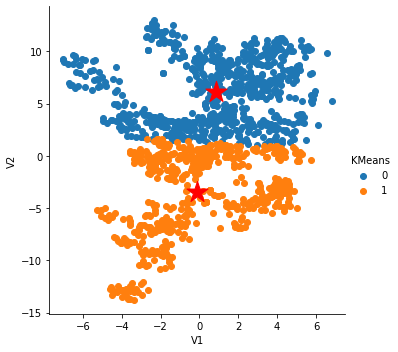

In [144]:
#plot out the result
g = sb.FacetGrid(data = df, hue = 'KMeans', size = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend();
plt.scatter(clusters[:,0], clusters[:,1], s=500, marker='*', c='r')

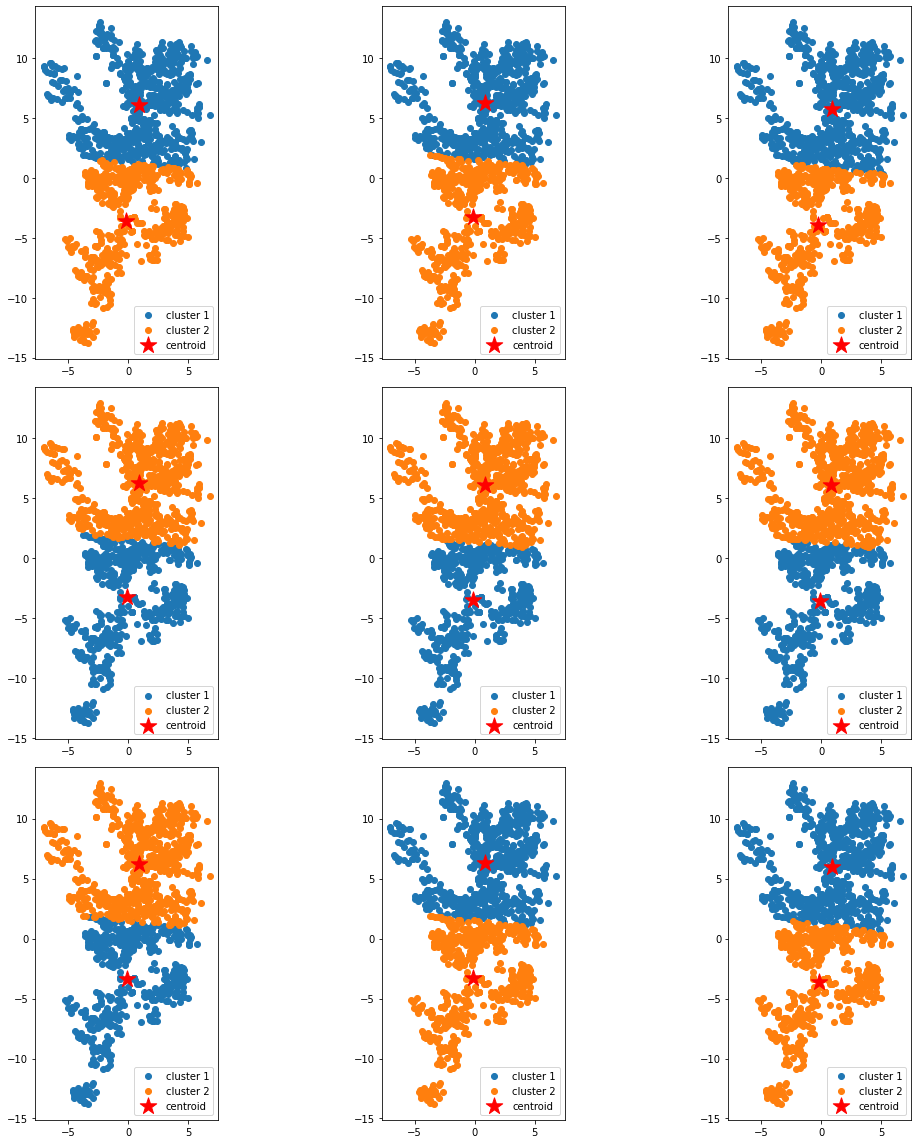

In [145]:

from sklearn.cluster import KMeans, SpectralClustering

n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=2,
                max_iter=3)
    km.fit(data)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(data[km.labels_ == 0, 0], data[km.labels_ == 0, 1],
                   label='cluster 1')
    ax[i].scatter(data[km.labels_ == 1, 0], data[km.labels_ == 1, 1],
                   label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].legend(loc='lower right')
    ax[i].set_aspect('equal')
plt.tight_layout();

In [146]:
df.groupby('KMeans').describe()


V1                                                                \
        count      mean       std     min      25%      50%     75%     max   
KMeans                                                                        
0       773.0  0.867409  2.908508 -7.0421 -0.95403  1.11660  3.1896  6.8248   
1       599.0 -0.125914  2.655152 -5.2943 -2.18825 -0.65767  2.0159  5.7403   

           V2            ...       V4          Class                           \
        count      mean  ...      75%     max  count      mean       std  min   
KMeans                   ...                                                    
0       773.0  6.108644  ... -0.38751  2.1547  773.0  1.315653  0.465076  1.0   
1       599.0 -3.479989  ...  0.75041  2.4495  599.0  1.611018  0.487927  1.0   

                            
        25%  50%  75%  max  
KMeans                      
0       1.0  1.0  2.0  2.0  
1       1.0  2.0  2.0  2.0  

[2 rows x 40 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Data With Correct Lables')

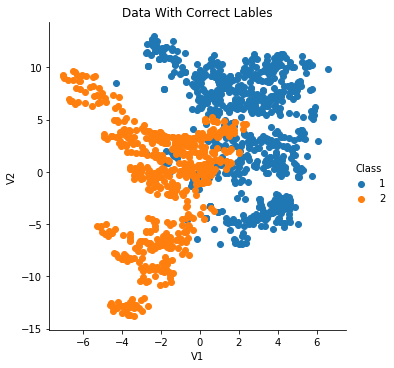

In [147]:
# plot the data with Correct labels
g = sb.FacetGrid(data = df, hue = 'Class', size = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend()
plt.title("Data With Correct Lables")




In [148]:
# correct the labels
df["KMeans"] = df["KMeans"].map({0: 1, 1: 2})

# calculate the accuracy of the model.
correct = 0

for i in range(0,1372):
    if df["Class"][i] == df["KMeans"][i]:
        correct+=1
print(correct/1372)

0.652332361516035
